<a href="https://colab.research.google.com/github/Jeongchan-Kim/Drug-Toxicity-Prediction-Regression-ver-/blob/main/Drug_Toxicity_Prediction_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyTDC
!pip install lifelines
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00
  Created wheel for PyTDC: filename=PyTDC-0.4.0-py3-none-any.whl size=139536 sha256=780183902c3a18eadcf61059c3b682104507a3306f6a0ae07e69db27f851a3da
  Stored in directory: /root/.cache/pip/wheels/65/da/1a/38e66a2b950c7acc0f41d3bbbc12071653d099baa5402d9c32
Successfully built PyTDC


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 11.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=df34e8618d69660ce85abdce381d564b582a5ed6eb5df549906c77629459281a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Preparing Data**

In [ ]:
from tdc.single_pred import Tox

# Upload LD50 data using TDC api
data = Tox(name = 'LD50_Zhu')
# Divide train-valid-test data
split = data.get_split()

Downloading...
100%|██████████| 707k/707k [00:00<00:00, 2.29MiB/s]
Loading...
Done!


In [ ]:
# checking divided data
split.keys()

dict_keys(['train', 'valid', 'test'])

# **Data pre-processing**

Molecular representations in AI-driven drug discovery: a review and practical guide

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

def smiles2morgan(s, radius = 2, nBits = 1024):
    """
    SMILES data -> morgan fingerprint (vetot of 1024 bits)

    Args:
        s (str): SMILES of a drug
        radius (int): ECFP radius
        bBits (int): size of binary representation

    Return ():
        morgan fingerprint 
    """
    try:
        mol = Chem.MolFromSmiles(s)
        features_vec = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        features = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(features_vec, features)
    except:
        print('rdkit not found this smiles for morgan: ' + s + ' convert to all 0 features')
        features = np.zeros((nBits, ))
        
    return features

In [ ]:
# adapting pre-prdcessing function
for mode in ['train', 'valid', 'test']:  
  split[mode]['embedding'] = split[mode]['Drug'].apply(smiles2morgan)

In [ ]:
split["test"]

,Drug_ID,Drug,Y,embedding
0,"Ether, alpha-(bromomethyl)-p-cyclopentylbenzyl...",CCCCOC(CBr)c1ccc(C2CCCC2)cc1,3.114,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Benzene, 1,4-dinitroso-",O=Nc1ccc(N=O)cc1,2.125,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"Succinic acid, mercapto-, diethyl ester, S-est...",CCOC(=O)CC(SP(=O)(OC)SC)C(=O)OCC,3.466,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"Phosphorodithioic acid, O,S,S-triethyl ester",CCOP(=O)(SCC)SCC,3.185,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"Phenol, 2-octyl- (9CI)",CCCCCCCCc1ccccc1O,1.867,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
1472,"1H-1,2,4-Triazole, 1-((2-(2,4-dichlorophenyl)-...",CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,2.353,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1473,"Phosphorothioic acid, O-(3-chloro-4-nitropheny...",CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])c(Cl)c1,3.814,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1474,"Dibenz(b,f)oxepin-2-acetic acid, 10,11-dihydro...",Cc1ccc2c(c1)CC(=O)c1cc(CC(=O)O)ccc1O2,2.937,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1475,"Phosphorothioic acid, O,O-dimethyl S-(2-(ethyl...",CCS(=O)(=O)CCSP(=O)(OC)OC,3.908,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# **Torch Dataset & Data Loader for batch**

In [ ]:
import torch
from torch import nn 
import torch.nn.functional as F
from torch.utils import data

In [ ]:
class data_process_loader(data.Dataset):

    def __init__(self, df):
        self.df = df

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        v_d = self.df.iloc[index]['embedding']  # input
        y = self.df.iloc[index]['Y'] # label

        return v_d, y

In [ ]:
train_dataset = data_process_loader(split["train"])
valid_dataset = data_process_loader(split["valid"])
test_dataset = data_process_loader(split["test"])

In [ ]:
# hyperparameter for Data Loader
params = {'batch_size': 64,
        'shuffle': True,
        'num_workers': 1,
        'drop_last': False}

In [ ]:
training_generator = data.DataLoader(train_dataset, **params)
valid_generator = data.DataLoader(valid_dataset, **params)
test_generator = data.DataLoader(test_dataset, **params)

In [ ]:
for v_d, y in training_generator:
    print(v_d)
    print(v_d.shape)
    print()
    print(y)
    print(y.shape)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
torch.Size([64, 1024])

tensor([2.2990, 3.6700, 2.6850, 2.3910, 1.6170, 2.9470, 3.1560, 2.5050, 2.3420,
        2.9870, 2.7640, 2.7810, 1.3880, 1.8690, 1.3250, 2.3670, 1.9860, 3.0620,
        4.0900, 1.4530, 1.7670, 2.2030, 1.7660, 2.2490, 1.9780, 2.2280, 1.6820,
        2.6380, 1.7130, 3.0880, 2.6780, 2.6110, 2.3090, 3.0860, 2.4970, 1.6600,
        1.6820, 1.5270, 2.6860, 4.4930, 3.8660, 2.0400, 2.9250, 2.3150, 1.6120,
        2.4320, 2.1430, 4.8260, 2.4310, 4.7300, 3.4910, 1.6870, 2.6000, 3.8900,
        2.4780, 1.6180, 4.4150, 2.8640, 1.9530, 2.6450, 1.9830, 1.3990, 1.8880,
        1.9490], dtype=torch.float64)
torch.Size([64])


# **MODEL**

# **Feature Extractor**

In [ ]:
class MLP(nn.Sequential):
	def __init__(self, input_dim, output_dim, hidden_dims_lst):
		'''Feature extractor
			Args:
				input_dim (int): 입력층 차원
				output_dim (int): 출력층 차원
				hidden_dims_lst (list): hidden 차원의 차원
		'''
		super(MLP, self).__init__()
  
		# Feature extractor layer size 
		layer_size = len(hidden_dims_lst) + 1

		# 각 층의 차원 크기를 담은 리스트 
		dims = [input_dim] + hidden_dims_lst + [output_dim]

		# 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v):
		# 입력 데이터 v로 forward pass 
		v = v.float().to(device)
		for i, l in enumerate(self.predictor):
			v = F.relu(l(v))
		return v  

# **Classifier**

In [ ]:
class Classifier(nn.Sequential):
	def __init__(self, model_drug, hidden_dim_drug, cls_hidden_dims):
		'''Classifier
			Args:
				model_drug : 앞서 생성한 Feature extractor 
				hidden_dim_drug (int): 
Classifier 입력층 차원
				cls_hidden_dims (list): 
Classifier hidden 차원
		'''
		super(Classifier, self).__init__()
  
		# feature extractor
		self.model_drug = model_drug

		# dropout
		self.dropout = nn.Dropout(0.1)
  
		# classifier 입력 차원
		self.input_dim_drug = hidden_dim_drug

		# classifier hidden 차원
		self.hidden_dims = cls_hidden_dims

		# classifier layer size 
		layer_size = len(self.hidden_dims) + 1

		# 각 층의 차원 크기를 담은 리스트 
		dims = [self.input_dim_drug] + self.hidden_dims + [1]
		
		# 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v_D):
		# feature extractor로 입력 데이터 encoding
		v_f = self.model_drug(v_D)
		
		# forword-pass with classify 
		for i, l in enumerate(self.predictor):
			if i==(len(self.predictor)-1):
				v_f = l(v_f)
			else:
				v_f = F.relu(self.dropout(l(v_f)))
		return v_f 

In [ ]:
# model hyperparameter
input_dim_drug = 1024
hidden_dim_drug = 256
cls_hidden_dims = [1024, 1024, 512]
mlp_hidden_dims_drug = [1024, 256, 64]

In [ ]:
model_drug = MLP(1024, hidden_dim_drug, mlp_hidden_dims_drug)

In [ ]:
model_drug

MLP(
  (predictor): ModuleList(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=256, bias=True)
  )
)

In [ ]:
model = Classifier(model_drug, hidden_dim_drug, cls_hidden_dims)

In [ ]:
model

Classifier(
  (model_drug): MLP(
    (predictor): ModuleList(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Linear(in_features=1024, out_features=256, bias=True)
      (2): Linear(in_features=256, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=256, bias=True)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (predictor): ModuleList(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)

# **MODEL Training**

In [ ]:
# hyperparameter for model training
learning_rate = 0.0001
decay         = 0.00001
train_epoch   = 15

In [ ]:
# optimizer 
opt = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = decay)
loss_fn = torch.nn.MSELoss()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Current Device: {device}")

Current Device: cuda


In [ ]:
import copy
from prettytable import PrettyTable
from time import time
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from lifelines.utils import concordance_index

In [ ]:
loss_history = []

max_MSE = 10000

# 모델 GPU 메모리에 올리기
model = model.to(device)

# Best 모델 초기화
model_max = copy.deepcopy(model)

# 결과 정리를 위한 PrettyTable
valid_metric_record = []
valid_metric_header = ["# epoch"] 
valid_metric_header.extend(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
table = PrettyTable(valid_metric_header)

float2str = lambda x:'%0.4f'%x # float 소숫점 4자리까지만 str로 바꾸기 

# 학습 진행
print('--- Go for Training ---')
# 학습 시작 시간 기록 
t_start = time() 

for epo in range(train_epoch):
    # Model training 
    model.train()
    
    # Mini-batch 학습 
    for i, (v_d, label) in enumerate(training_generator):
        # input data gpu에 올리기 
        v_d = v_d.float().to(device) 
        # forward-pass
        score = model(v_d) 

        n = torch.squeeze(score, 1)

        # 미리 정의한 손실함수(MSE)로 손실(loss) 계산 
        loss = loss_fn(n.float(), label.float().to(device))

        # 각 iteration 마다 loss 기록 
        loss_history.append(loss.item())

        # gradient 초기화
        opt.zero_grad()
        # back propagation
        loss.backward()
        # parameter update
        opt.step()
    
    # gradient tracking X
    with torch.set_grad_enabled(False):
        
        y_pred = []
        y_label = []
        # model validation
        model.eval()

        for i, (v_d, label) in enumerate(valid_generator):
            # validation 입력 데이터 gpu에 올리기
            v_d = v_d.float().to(device)

            # forward-pass
            score = model(v_d)

            # 예측값, 참값 cpu로 옮기고 numpy 형으로 변환
            logits = torch.squeeze(score).cpu().numpy()
            label_ids = label.cpu().numpy()

            # 예측값, 참값 기록하기
            y_label = y_label + label_ids.flatten().tolist()
            y_pred = y_pred + logits.flatten().tolist()
    
    # metric 계산
    mse = mean_squared_error(y_label, y_pred) # MSE 
    r2 = pearsonr(y_label, y_pred)[0] # Pearson correlation coefficient
    p_val = pearsonr(y_label, y_pred)[1] # Pearson correlation p-value
    CI =  concordance_index(y_label, y_pred) # CI 

    # 계산한 metric 합치기
    lst = ["epoch " + str(epo)] + list(map(float2str,[mse, r2, p_val, CI]))

    # 각 epoch 마다 결과값 pretty table에 기록
    table.add_row(lst)
    valid_metric_record.append(lst)
    
    # mse 기준으로 best model 업데이트
    if mse < max_MSE:
        # best model deepcopy 
        model_max = copy.deepcopy(model)
        # max MSE 업데이트 
        max_MSE = mse

    # 각 epoch 마다 결과 출력 
    print('Validation at Epoch '+ str(epo + 1) + ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
						 + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])

--- Go for Training ---
Validation at Epoch 1 , MSE: 0.57077 , Pearson Correlation: 0.64662 with p-value: 1.30E-88 , Concordance Index: 0.71701
Validation at Epoch 2 , MSE: 0.48462 , Pearson Correlation: 0.70548 with p-value: 3.72E-112 , Concordance Index: 0.74105
Validation at Epoch 3 , MSE: 0.44410 , Pearson Correlation: 0.73647 with p-value: 4.61E-127 , Concordance Index: 0.75782
Validation at Epoch 4 , MSE: 0.41264 , Pearson Correlation: 0.75955 with p-value: 1.28E-139 , Concordance Index: 0.76911
Validation at Epoch 5 , MSE: 0.41591 , Pearson Correlation: 0.76028 with p-value: 4.86E-140 , Concordance Index: 0.76941
Validation at Epoch 6 , MSE: 0.42285 , Pearson Correlation: 0.75923 with p-value: 1.95E-139 , Concordance Index: 0.77202
Validation at Epoch 7 , MSE: 0.42960 , Pearson Correlation: 0.75798 with p-value: 1.02E-138 , Concordance Index: 0.77067
Validation at Epoch 8 , MSE: 0.42347 , Pearson Correlation: 0.75895 with p-value: 2.86E-139 , Concordance Index: 0.77269
Validatio

# **Model Testing**

In [ ]:
for i, (v_d, label) in enumerate(test_dataset):
    print(v_d)
    print(label)
    break

[0. 1. 0. ... 0. 0. 0.]
3.114


In [ ]:
y_pred = []
y_label = []

model.eval()
for i, (v_d, label) in enumerate(test_generator):
    # input data gpu에 올리기 
    v_d = v_d.float().to(device)

    # forward-pass
    score = model(v_d)

    # 예측값 gradient graph detach -> cpu로 옮기기 -> numpy 형으로 변환 
    logits = torch.squeeze(score).detach().cpu().numpy()

    # 참값 cpu로 옮기고 numpy 형으로 변환 
    label_ids = label.cpu().numpy()

    # 예측값, 참값 기록
    y_label = y_label + label_ids.flatten().tolist()
    y_pred = y_pred + logits.flatten().tolist()

# metric 계산
mse = mean_squared_error(y_label, y_pred)
r2 = pearsonr(y_label, y_pred)[0]
p_val = pearsonr(y_label, y_pred)[1]
CI =  concordance_index(y_label, y_pred)

print('TestSet Performence Metric '+  ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
        + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])

TestSet Performence Metric  , MSE: 0.39103 , Pearson Correlation: 0.75453 with p-value: 4.27E-272 , Concordance Index: 0.75574


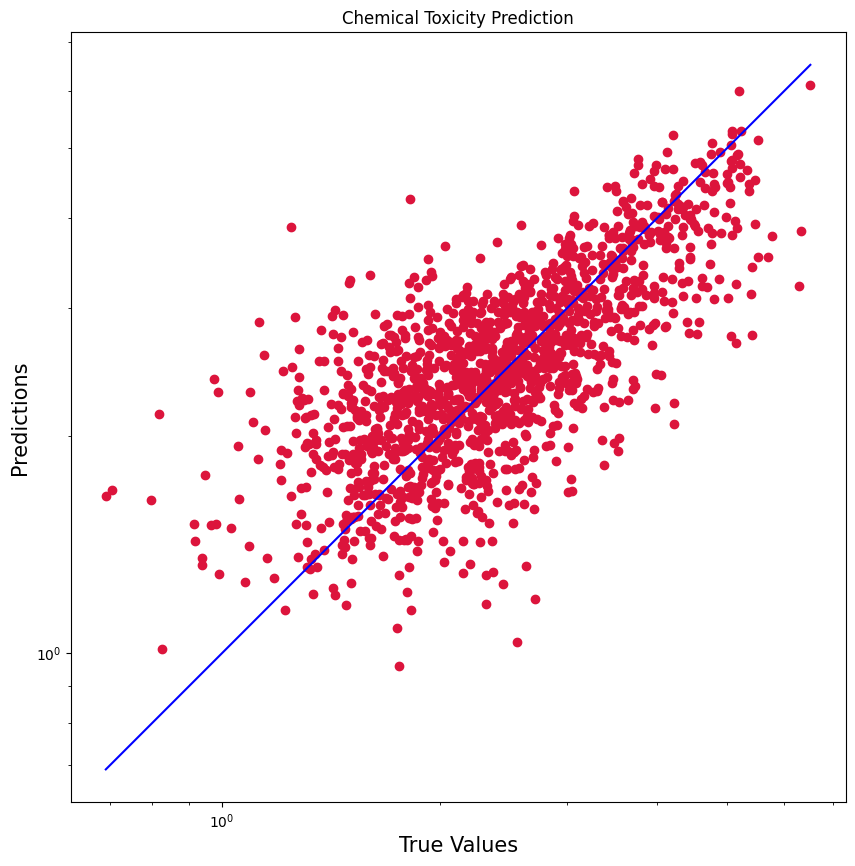

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_label, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_label))
p2 = min(min(y_pred), min(y_label))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Chemical Toxicity Prediction')
plt.show()